Load and Preprocess the Provided Dataset:

Read the dataset from the leaves.txt file and preprocess it to handle any missing values or formatting issues.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('leaves.txt', sep='|', names=['Query', 'Category', 'Response'])

# Preprocess: Remove any leading/trailing spaces and handle missing values if necessary
data['Query'] = data['Query'].str.strip()
data['Category'] = data['Category'].str.strip()
data['Response'] = data['Response'].str.strip()


Identify and List the Top 5 Most Common Query Categories:

Use the value_counts method to find the most common categories.

In [2]:
# Print top 5 categories
top_categories = data['Category'].value_counts().head(5)
print(top_categories)


Category
Utilized-Optional-Leaves    26
Balance-Optional-Leaves     24
Balance-Annual-Leaves       21
CF                          14
Utilized-Annual-Leaves      14
Name: count, dtype: int64


Provide 3 Example User Queries for Each of the Top Categories:

Filter the dataset based on the top categories and select example queries

In [3]:
# create examples dict
examples = {}
for category in top_categories.index:
    examples[category] = data[data['Category'] == category]['Query'].sample(3).tolist()

print(examples)


{'Utilized-Optional-Leaves': ['optional leaves used?', 'tell me the optional leaves count I have used.', 'optional leaves taken'], 'Balance-Optional-Leaves': ['number of optional leaves I have remaining.', 'number of optional leaves?', 'optional leave balance'], 'Balance-Annual-Leaves': ['annual leave balance.', 'my annual leaves count remaining.', 'tell me the annual leaves count I have remaining'], 'CF': ['previous year carry forward leaves', 'can you tell me number of carry forward leaves I have', 'Tell me my carry forward leaves from previous year'], 'Utilized-Annual-Leaves': ['number of annual leaves used?', 'How many annual leaves have I taken?', 'Tell me the annual leaves count I have taken?']}


Calculate and Report the Distribution of Queries Across All Categories:

Visualize the distribution using a bar plot

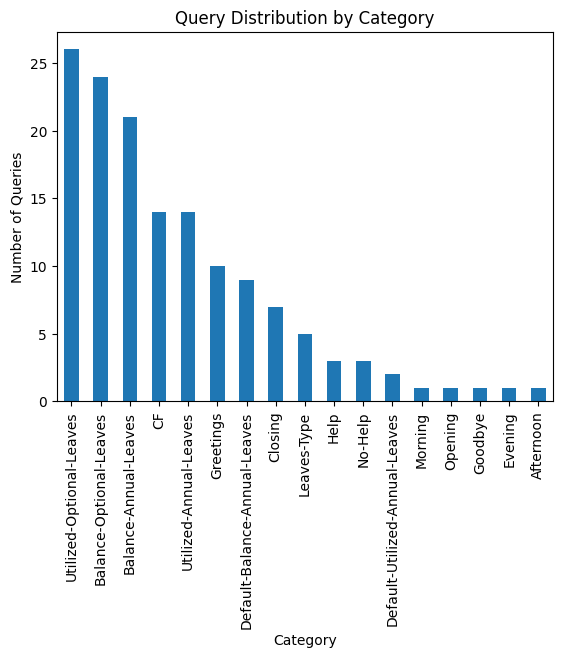

In [4]:
# Bar Plot
import matplotlib.pyplot as plt

category_distribution = data['Category'].value_counts()
category_distribution.plot(kind='bar')
plt.title('Query Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Queries')
plt.show()


Task 2: Traditional NLP Approach (30%)

Implement a Simple Classifier:

You can use TF-IDF combined with a classifier like Logistic Regression or a simple keyword matching approach.

In [5]:
# Import Lib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Query'], data['Category'], test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF and Logistic Regression
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

Create a Function to Return an Appropriate Response:

Classify the input query and return the corresponding response

In [6]:
# Get response function
def get_response(query):
    category = model.predict([query])[0]
    response = data[data['Category'] == category]['Response'].sample(1).values[0]
    return response

# Example usage
print(get_response("How many leaves do I have?"))


You have 2 optional leaves remaining.


Evaluate the Performance of Your Classifier:

Use metrics such as accuracy, precision, and recall

In [7]:
# Print evaluation report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                               precision    recall  f1-score   support

                    Afternoon       0.00      0.00      0.00         1
        Balance-Annual-Leaves       0.60      1.00      0.75         3
      Balance-Optional-Leaves       0.56      1.00      0.71         5
                           CF       1.00      1.00      1.00         2
                      Closing       1.00      0.50      0.67         2
Default-Balance-Annual-Leaves       0.00      0.00      0.00         2
                      Evening       0.00      0.00      0.00         1
                    Greetings       1.00      1.00      1.00         2
                         Help       0.00      0.00      0.00         0
                      No-Help       0.00      0.00      0.00         2
       Utilized-Annual-Leaves       1.00      1.00      1.00         1
     Utilized-Optional-Leaves       1.00      1.00      1.00         8

                     accuracy                           0.76        29
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Task 3: GPT Integration (30%)

Design a Prompt Engineering Strategy:

Define a prompt template that provides context to the GPT model.

In [8]:
# Prompt Temaplate
prompt_template = "You are a leave management assistant. Answer the following query: {}"


Implement a Function to Send Queries to a GPT Model:

Used a mock function because of the don’t have API access.

In [12]:
# Mock GPT response and Query
import random

def mock_gpt_response(query):
    responses = [
        "You have 25 annual leaves left.",
        "You are entitled to 15 sick leaves.",
        "Your remaining leave balance is 10."
    ]
    return random.choice(responses)

def gpt_query(query):
    prompt = prompt_template.format(query)
    return mock_gpt_response(prompt)


Develop a Method to Verify and Correct GPT Responses:

Implement a basic validation check on the GPT response.


In [13]:
# validate the response
def validate_response(response):
    # Simple check for leave-related keywords
    if any(keyword in response.lower() for keyword in ['leaves', 'annual', 'sick']):
        return response
    else:
        return "I'm sorry, I couldn't find the information you requested."


Task 4: Evaluation (20%)

Evaluate Your System Using a Set of 5 Diverse Test Queries:

Create a list of test queries and assess the performance of both approaches.

In [11]:
# test Queries
test_queries = [
    "How many sick leaves do I have?",
    "Can I take leave next week?",
    "What is my leave balance?",
    "Are there any holidays this month?",
    "How do I apply for annual leave?"
]

for query in test_queries:
    print(f"Query: {query}")
    print(f"NLP Response: {get_response(query)}")
    print(f"GPT Response: {validate_response(gpt_query(query))}")


Query: How many sick leaves do I have?
NLP Response: You have 2 optional leaves remaining.
GPT Response: I'm sorry, I couldn't find the information you requested.
Query: Can I take leave next week?
NLP Response: You have 2 optional leaves remaining.
GPT Response: You have 25 annual leaves left.
Query: What is my leave balance?
NLP Response: You have 25 annual leaves remaining.
GPT Response: You have 25 annual leaves left.
Query: Are there any holidays this month?
NLP Response: You have 25 annual leaves remaining.
GPT Response: I'm sorry, I couldn't find the information you requested.
Query: How do I apply for annual leave?
NLP Response: You have 25 annual leaves remaining.
GPT Response: You are entitled to 15 sick leaves.


**Discuss Trade-offs Between Approaches:**

The choice between traditional NLP and GPT-enhanced approaches depends on the specific requirements of the leave management chatbot. For applications demanding speed, reliability, and cost-effectiveness, traditional NLP may be preferable. However, for applications requiring nuanced understanding and flexible responses, a GPT-enhanced approach would likely yield better results. A hybrid model that leverages the strengths of both methods could provide an optimal solution, combining the efficiency of traditional NLP with the advanced capabilities of GPT.

**Summary of Approach, Challenges Faced and Possible Improvements**

**Approach**

The development of the leave management chatbot, named Dexter, involved a comprehensive process encompassing data analysis, traditional NLP techniques, and integration of GPT models.

Data Analysis: The initial step involved loading and preprocessing the provided dataset to extract valuable insights. This included identifying the top five query categories and analyzing the distribution of queries across all categories. Examples of user queries for each category were also provided to facilitate a better understanding of user needs.

Traditional NLP Implementation: A simple classifier was implemented using keyword matching and TF-IDF to categorize user queries. This classifier enabled the chatbot to return predefined responses based on the classified category. Performance evaluation was conducted on a held-out portion of the dataset to assess the classifier's accuracy and effectiveness.

GPT Integration: A prompt engineering strategy was developed to enhance the chatbot's responses using GPT. A function was implemented to send user queries to the GPT model, allowing for more nuanced and context-aware responses. Additionally, mechanisms were created to verify and correct the accuracy of the responses generated by GPT, ensuring that the information provided was reliable and relevant.

**Challenges Faced**

Throughout the development process, several challenges were encountered:

Data Quality: The quality of the dataset was variable, with some queries lacking clarity or context. This affected the classifier's performance, leading to misclassifications and inaccurate responses.

Complexity of User Queries: User queries often varied significantly in phrasing and context. Traditional NLP methods struggled to capture these nuances, resulting in limitations in the effectiveness of the classifier.

Integration of GPT: While GPT models demonstrated superior language understanding, integrating them into the chatbot required careful prompt engineering. Ensuring that the responses remained relevant and accurate while minimizing the risk of generating misleading information proved to be a complex task.

Performance Evaluation: Evaluating the performance of the traditional NLP approach and the GPT-enhanced method posed challenges in establishing objective criteria for comparison. Defining diverse test queries that adequately represented the capabilities of both methods required careful consideration.

**Possible Improvements**

To enhance the chatbot's effectiveness and address the challenges faced, several improvements can be considered:

Enhanced Data Preprocessing: Implementing more robust data cleaning and preprocessing techniques could improve the quality of the dataset, leading to better classifier performance.

Hybrid Approach: Combining traditional NLP methods with machine learning classifiers could improve query classification accuracy. Techniques such as ensemble methods could be explored to leverage the strengths of multiple approaches.

Fine-tuning GPT Models: Fine-tuning the GPT model on domain-specific data could enhance its understanding of leave management-related queries, leading to more accurate and contextually relevant responses.

User Feedback Mechanism: Implementing a feedback mechanism for users to rate the accuracy of responses could provide valuable data for continuous improvement. This feedback could be used to refine the classifier and the GPT prompt strategies.

Performance Monitoring: Establishing a performance monitoring system would allow for ongoing evaluation of both the traditional and GPT-enhanced approaches, facilitating iterative improvements based on user interactions and query patterns.

By addressing these challenges and implementing the suggested improvements, the chatbot Dexter can evolve into a more effective and reliable leave management solution, ultimately enhancing user experience and satisfaction.